In [1]:
import argparse
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
import mplhep as hep
from coffea.util import load
from coffea.hist import plot
import coffea.hist as hist
import itertools
import os
from utils import histogram_settings, rescale, lumi, xsecs

In [2]:
inputfile = "/work/mmarcheg/BTVNanoCommissioning/histograms/hists_fattag_pileupJEC_2018_limit10.coffea7"
accumulator = load(inputfile)
accumulator_rescaled = rescale(accumulator, xsecs, lumi[2017])

  GluGluHToBB_M-125_13TeV 	 13821152.338323593 events	 27.8 pb
  GluGluHToCC_M-125_13TeV 	 18086711.75974846 events	 27.8 pb
  QCD_Pt-1000toInf_MuEnrichedPt5 	 1953235.4730587127 events	 1.078 pb
  QCD_Pt-120to170_MuEnrichedPt5 	 2305388.549970269 events	 21230.0 pb
  QCD_Pt-170to300_MuEnrichedPt5 	 2171801.0 events	 7055.0 pb
  QCD_Pt-300to470_MuEnrichedPt5 	 1572857.2755718231 events	 619.3 pb
  QCD_Pt-470to600_MuEnrichedPt5 	 2038093.6389356852 events	 59.24 pb
  QCD_Pt-600to800_MuEnrichedPt5 	 1569642.0264371634 events	 18.21 pb
  QCD_Pt-800to1000_MuEnrichedPt5 	 980846.351049979 events	 3.275 pb
{'GluGluHToBB_M-125_13TeV': 0.08347350291487603, 'GluGluHToCC_M-125_13TeV': 0.06378716127757017, 'QCD_Pt-1000toInf_MuEnrichedPt5': 0.022904048496489315, 'QCD_Pt-120to170_MuEnrichedPt5': 382.1676827584496, 'QCD_Pt-170to300_MuEnrichedPt5': 134.81092420530243, 'QCD_Pt-300to470_MuEnrichedPt5': 16.3402938074316, 'QCD_Pt-470to600_MuEnrichedPt5': 1.2062546847866298, 'QCD_Pt-600to800_MuEnrichedPt5

/work/mmarcheg/miniconda3/envs/myCoffeaEnv/lib/python3.9/site-packages/coffea/hist/hist_tools.py:347: RuntimeWarning: Not all requested indices present in <Cat (name=dataset) instance at 0x7ff5e51121f0>
  warnings.warn("Not all requested indices present in %r" % self, RuntimeWarning)


In [3]:
h = accumulator['fatjet_pt_basic']
h_r = accumulator_rescaled['fatjet_pt_basic']
print(h.values())

{('QCD_Pt-800to1000_MuEnrichedPt5', 'b'): array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.53397467e-04, 0.00000000e+

In [4]:
datasets = [str(s) for s in h.axis('dataset').identifiers() if str(s) != 'dataset']
datasets_QCD = [dataset for dataset in datasets if (('BTagMu' not in dataset) & ('GluGlu' not in dataset))]
flavors = [str(s) for s in h.axis('flavor').identifiers() if str(s) != 'flavor']
flavors_QCD = [flavor for flavor in flavors if 'Data' not in flavor]

mapping = {
        r'QCD ($\mu$ enriched)' : [dataset for dataset in datasets if 'QCD_Pt' in dataset],
        #'BTagMu' : [ idata for idata in datasets if 'BTagMu' in idata ],
        'BTagMuA' : 'BTagMuA',
        'BTagMuB' : 'BTagMuB',
        'BTagMuC' : 'BTagMuC',
        'BTagMuD' : 'BTagMuD',
        'BTagMuE' : 'BTagMuE',
        'BTagMuF' : 'BTagMuF',
    }
mapping_f = {
        'l' : '_l',
        'b' : '_b',
        'c' : '_c',
        'bb' : '_bb',
        'cc' : '_cc',
        'BTagMu' : [ idata for idata in flavors if 'BTagMu' in idata ],
    }
mapping_f

{'l': '_l', 'b': '_b', 'c': '_c', 'bb': '_bb', 'cc': '_cc', 'BTagMu': []}

In [5]:
h_r = h_r.group("dataset", hist.Cat("dataset", "Dataset"), mapping)

<AxesSubplot:xlabel='lead. FatJet $p_{T}$ [GeV]', ylabel='Events'>

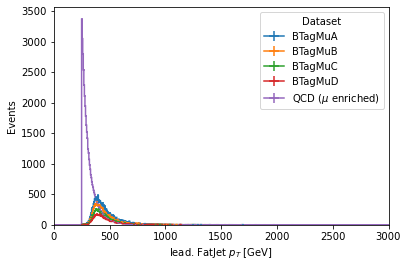

In [6]:
hist.plot1d(h_r.sum('flavor'), legend_opts={'loc':1})
#h_r[(datasets_QCD, flavors)].sum('dataset').values()

<AxesSubplot:xlabel='lead. FatJet $p_{T}$ [GeV]', ylabel='Events'>

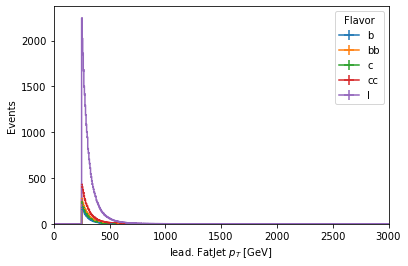

In [7]:
hist.plot1d(h[(datasets_QCD, flavors)].sum('dataset'), legend_opts={'loc':1})